In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ENGG_680_Project/Database/

/content/drive/MyDrive/ENGG_680_Project/Database


In [3]:
!ls

'SS CFST Database_Finalised_for correlation.xlsx'  'SS CFST Database.xlsx'
'SS CFST Database_Finalised.xlsx'


In [4]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")

In [5]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [6]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-6.15227187e+00  8.75088673e+00  3.45886241e+02  3.08396920e+00
 -2.17835665e+02 -8.31372536e-03  1.83790036e+00 -2.23544062e-01
  4.95766786e+01  4.01742245e+00]
Intercept: 
 0.0


In [10]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 100302.77927202075
R^2 Score: 0.9232272764100722


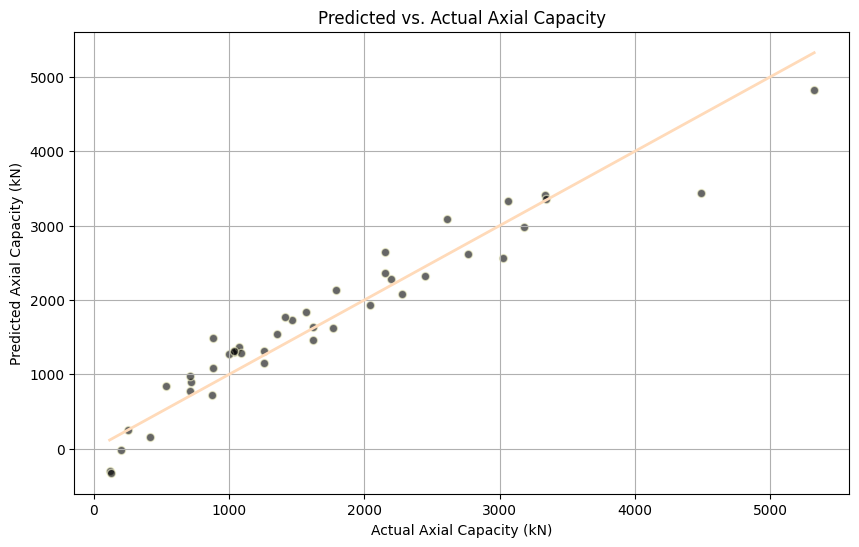

In [13]:
import seaborn as sns

# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='black', edgecolors='lightgoldenrodyellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'peachpuff', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.show()